In [1]:
import os
import pandas as pd
import pyodbc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Connect the ssql server
server = 'DESKTOP-N5H5P61\SQLEXPRESS01'  
database = 'OTT_Platform'

In [3]:
conn = pyodbc.connect('DRIVER={SQL Server};SERVER=DESKTOP-N5H5P61\SQLEXPRESS01;DATABASE=OTT_Platform;Trusted_Connection=yes;')


In [4]:
query = "SELECT * FROM Content_Scheduling"
df = pd.read_sql(query, conn)

C:\Users\DELL\AppData\Local\Temp\ipykernel_17960\3998914339.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


In [5]:
df.head()

,Content_ID,Content_Type,Genre,Release_Date,Time_of_Day,Day_of_the_Week,Duration_mins,Viewership,Average_Watch_Time_mins,Peak_Viewership_Time,...,Viewer_Location,Likes,Shares,Comments,User_Ratings,Seasonality,Content_Popularity,Competitor_Content,Promotion_Data,Subscription_Data
0,1,Movie,Thriller,2024-07-03,23:57:00.0000000,Thursday,121,8203,72,10:17:00.0000000,...,Germany,299,1746,589,1.7,Fall,Low,Similar Doc C,Social Media,8883
1,2,Series,Comedy,2024-09-08,20:57:00.0000000,Friday,1200,64148,115,15:25:00.0000000,...,Australia,1615,36,127,1.1,Spring,Low,Similar Series B,Print Media,3850
2,3,Movie,Sci-Fi,2024-09-07,23:25:00.0000000,Friday,170,8216,43,08:50:00.0000000,...,Australia,1502,837,1084,3.0,Fall,Medium,Similar Thriller H,Email Campaign,7835
3,4,Series,Romance,2024-07-15,06:59:00.0000000,Friday,506,52848,87,14:57:00.0000000,...,USA,2148,1743,563,1.0,Winter,Medium,Similar History G,Online Ads,17506
4,5,Documentary,Fantasy,2024-07-05,18:27:00.0000000,Sunday,77,14090,42,03:40:00.0000000,...,Germany,431,863,1035,4.3,Winter,Low,Similar Movie A,30% off,8675


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Content_ID               1000 non-null   int64  
 1   Content_Type             1000 non-null   object 
 2   Genre                    1000 non-null   object 
 3   Release_Date             1000 non-null   object 
 4   Time_of_Day              1000 non-null   object 
 5   Day_of_the_Week          1000 non-null   object 
 6   Duration_mins            1000 non-null   int64  
 7   Viewership               1000 non-null   int64  
 8   Average_Watch_Time_mins  1000 non-null   int64  
 9   Peak_Viewership_Time     1000 non-null   object 
 10  Peak_Viewership_Day      1000 non-null   object 
 11  Viewer_Age               1000 non-null   object 
 12  Viewer_Gender            1000 non-null   object 
 13  Viewer_Location          1000 non-null   object 
 14  Likes                    

In [7]:
#Size of dataset
df.shape

(1000, 23)

### Observation
- The dataset contains 23 columns and 1000 rows
- Viewership is the target variable
- There are 9 numeric columns and 11 categorical columns, which will need to be transformed into numerical representations before applying a linear regression model (using techniques like One-Hot Encoding or Label Encoding)
- Datetime Columns: 3 columns (Release_Date, Peak_Viewership_Time, Peak_Viewership_Day) which need to be converted to datetime data type before analysis.

In [8]:
# Converting onto Release_Date, Peak_Viewership_Time, Peak_Viewership_Day datetime datatype
df['Release_Date'] = pd.to_datetime(df['Release_Date'])
df['Peak_Viewership_Time'] = pd.to_datetime(df['Peak_Viewership_Time'])
df['Time_of_Day'] = pd.to_datetime(df['Time_of_Day'], format='%H:%M:%S.%f', errors='coerce')

C:\Users\DELL\AppData\Local\Temp\ipykernel_17960\1900878910.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Peak_Viewership_Time'] = pd.to_datetime(df['Peak_Viewership_Time'])


In [9]:
# Extracting features from datetime columns
df['Release_Year'] = df['Release_Date'].dt.year
df['Release_Month'] = df['Release_Date'].dt.month
df['Release_Day'] = df['Release_Date'].dt.day
df['Release_Weekday'] = df['Release_Date'].dt.weekday  # 0: Monday, 6: Sunday

df['Peak_Viewership_Hour'] = df['Peak_Viewership_Time'].dt.hour

# Extract the hour of the day (0 to 23)
df['Time_of_Day_Hour'] = df['Time_of_Day'].dt.hour

In [10]:
# Drop the original datetime columns
df = df.drop(columns=['Release_Date', 'Time_of_Day', 'Peak_Viewership_Time'])

In [11]:
df.describe()

,Content_ID,Duration_mins,Viewership,Average_Watch_Time_mins,Likes,Shares,Comments,User_Ratings,Subscription_Data,Release_Year,Release_Month,Release_Day,Release_Weekday,Peak_Viewership_Hour,Time_of_Day_Hour
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,301.962000,51178.148000,63.044000,1497.42500,973.104000,743.11600,2.810200,10007.388000,2024.001000,7.803000,14.501000,3.031000,10.938000,11.412000
std,288.819436,322.918846,28556.288449,29.020204,883.55218,581.318948,441.57063,1.179774,5821.697752,0.031623,0.722989,9.004948,2.008002,7.041857,6.909703
min,1.000000,45.000000,62.000000,24.000000,11.00000,4.000000,2.00000,1.000000,4.000000,2024.000000,7.000000,1.000000,0.000000,0.000000,0.000000
25%,250.750000,96.000000,26723.500000,40.000000,724.25000,482.500000,362.75000,1.900000,4789.500000,2024.000000,7.000000,7.000000,1.000000,4.000000,6.000000
50%,500.500000,145.000000,51753.000000,54.000000,1524.00000,972.500000,729.00000,2.900000,10065.000000,2024.000000,8.000000,13.000000,3.000000,11.000000,11.000000
75%,750.250000,404.750000,75754.250000,83.000000,2307.00000,1466.000000,1130.25000,3.700000,14957.750000,2024.000000,8.000000,23.000000,5.000000,17.000000,17.000000
max,1000.000000,1227.000000,99969.000000,135.000000,2998.00000,1999.000000,1499.00000,5.000000,19990.000000,2025.000000,9.000000,31.000000,6.000000,23.000000,23.000000


In [12]:
# visitors
df['Viewership'].describe()

count     1000.000000
mean     51178.148000
std      28556.288449
min         62.000000
25%      26723.500000
50%      51753.000000
75%      75754.250000
max      99969.000000
Name: Viewership, dtype: float64

<Axes: xlabel='Viewership', ylabel='Count'>

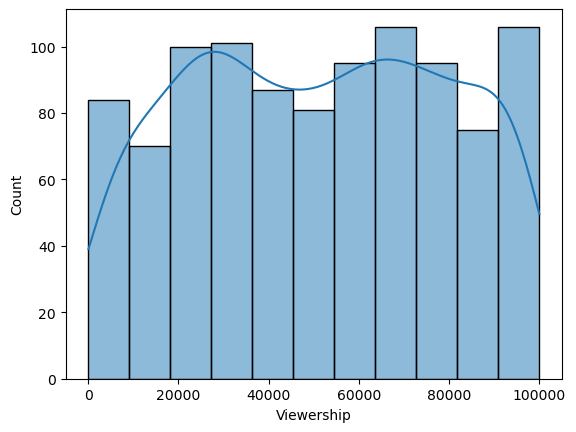

In [13]:
sns.histplot(df['Viewership'], kde=True)

### Data Preprcossing

In [14]:

df.isnull().sum()

Content_ID                 0
Content_Type               0
Genre                      0
Day_of_the_Week            0
Duration_mins              0
Viewership                 0
Average_Watch_Time_mins    0
Peak_Viewership_Day        0
Viewer_Age                 0
Viewer_Gender              0
Viewer_Location            0
Likes                      0
Shares                     0
Comments                   0
User_Ratings               0
Seasonality                0
Content_Popularity         0
Competitor_Content         0
Promotion_Data             0
Subscription_Data          0
Release_Year               0
Release_Month              0
Release_Day                0
Release_Weekday            0
Peak_Viewership_Hour       0
Time_of_Day_Hour           0
dtype: int64

### Checking for Duplicates

In [15]:
if df.duplicated().sum() == 0:
    print("No duplicate rows found in the dataset.")
else:
    print(f"{df.duplicated().sum()} duplicate rows found.")

No duplicate rows found in the dataset.


### Outlier Detection and Treatment

In [16]:

df_num = df.select_dtypes(include=[np.number])

In [17]:
# Check for negative values in the entire DataFrame
# Count negative values in each column
negative_counts = (df_num < 0).sum()

# Print the count of negative values in each column
print("Count of negative values in each column:")
print(negative_counts)

Count of negative values in each column:
Content_ID                 0
Duration_mins              0
Viewership                 0
Average_Watch_Time_mins    0
Likes                      0
Shares                     0
Comments                   0
User_Ratings               0
Subscription_Data          0
Release_Year               0
Release_Month              0
Release_Day                0
Release_Weekday            0
Peak_Viewership_Hour       0
Time_of_Day_Hour           0
dtype: int64


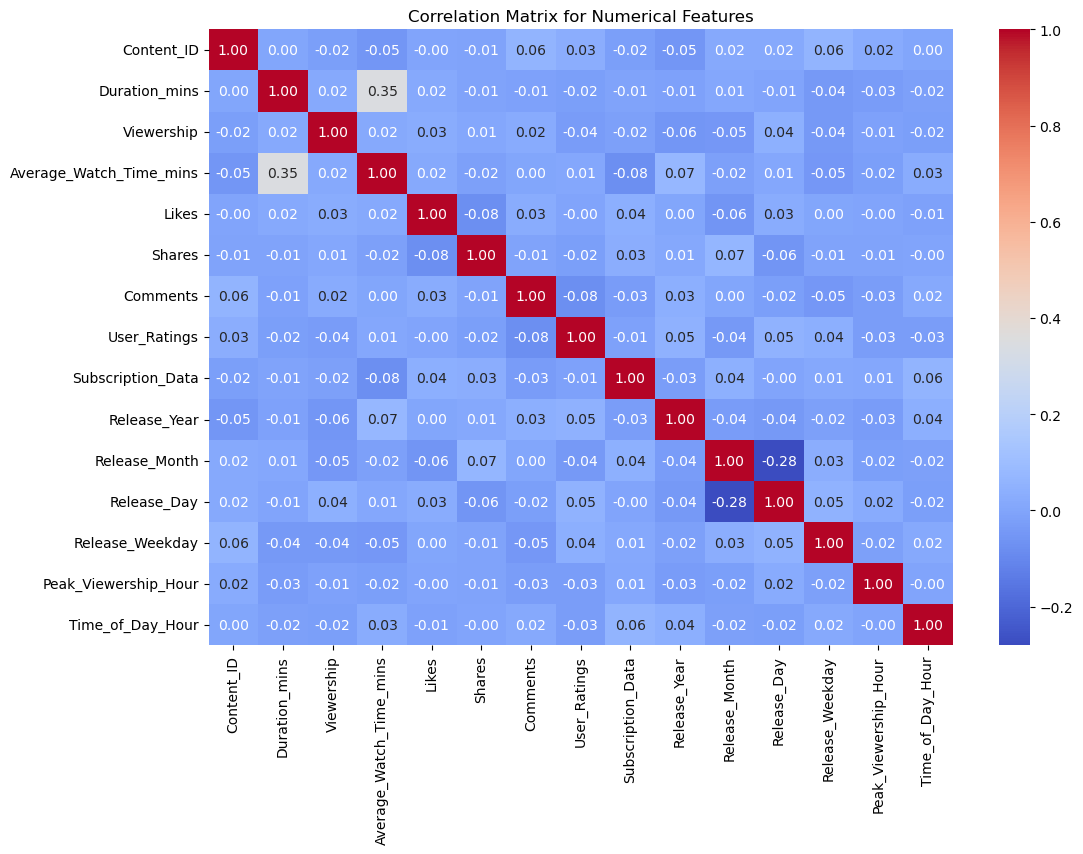

In [18]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_num.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Numerical Features')
plt.show()

### Observations
- Duration_mins and Average_Watch_Time_mins have a moderate positive correlation (0.35).

- Release_Month and Release_Day show a slight negative correlation (-0.28).

- Most features have weak or no correlation with each other (values near 0).

- User_Ratings is weakly correlated with all other features — likely influenced by subjective factors.

- Peak_Viewership_Weekday has missing correlation data — check for missing values.

- No strong multicollinearity detected — good for modeling.

In [19]:
df_num.columns

Index(['Content_ID', 'Duration_mins', 'Viewership', 'Average_Watch_Time_mins',
       'Likes', 'Shares', 'Comments', 'User_Ratings', 'Subscription_Data',
       'Release_Year', 'Release_Month', 'Release_Day', 'Release_Weekday',
       'Peak_Viewership_Hour', 'Time_of_Day_Hour'],
      dtype='object')

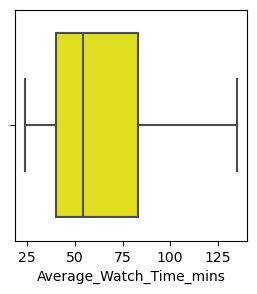

In [20]:
plt.figure(figsize=(3, 3))
sns.boxplot(x=df_num['Average_Watch_Time_mins'], color='yellow')
plt.show()

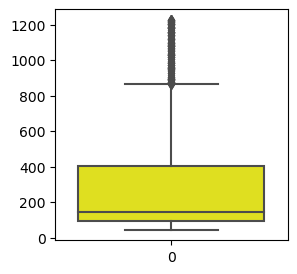

In [21]:
plt.figure(figsize=(3, 3))
sns.boxplot(df_num['Duration_mins'], color='yellow')
plt.show()

In [22]:

Q1 = df_num['Duration_mins'].quantile(0.25)
Q3 = df_num['Duration_mins'].quantile(0.75)
IQR = Q3 - Q1
print(f"IQR for Duration_mins: {IQR}")

IQR for Duration_mins: 308.75


In [23]:
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
# Identifying outliers
outliers = df_num[(df_num['Duration_mins'] < lower_bound) | (df_num['Duration_mins'] > upper_bound)]
outlier_count = outliers.shape[0]
print(f"Number of outliers in Duration_mins: {outlier_count}")

Number of outliers in Duration_mins: 101


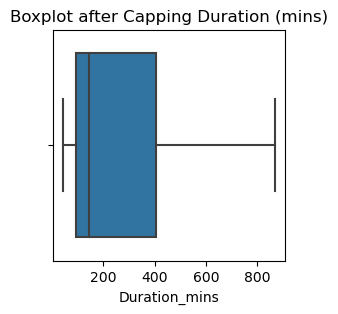

In [24]:
# Calculate the IQR for Duration (mins)
Q1 = df['Duration_mins'].quantile(0.25)
Q3 = df['Duration_mins'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap the outliers
df['Duration_mins'] = np.where(df['Duration_mins'] > upper_bound, upper_bound, df['Duration_mins'])
df['Duration_mins'] = np.where(df['Duration_mins'] < lower_bound, lower_bound, df['Duration_mins'])

# Check for outliers again after capping
plt.figure(figsize=(3,3))
sns.boxplot(x=df['Duration_mins'])
plt.title('Boxplot after Capping Duration (mins)')
plt.show()

### Converting the categorical variables to numerical using One-Hot Encoding

In [25]:
df_cat = df.select_dtypes(include=['object', 'category'])

In [26]:
df_cat.columns

Index(['Content_Type', 'Genre', 'Day_of_the_Week', 'Peak_Viewership_Day',
       'Viewer_Age', 'Viewer_Gender', 'Viewer_Location', 'Seasonality',
       'Content_Popularity', 'Competitor_Content', 'Promotion_Data'],
      dtype='object')

In [27]:
df_cat.describe().T

,count,unique,top,freq
Content_Type,1000,3,Movie,341
Genre,1000,9,Thriller,127
Day_of_the_Week,1000,7,Wednesday,160
Peak_Viewership_Day,1000,7,Saturday,366
Viewer_Age,1000,4,35-44,261
Viewer_Gender,1000,2,Female,519
Viewer_Location,1000,8,UK,134
Seasonality,1000,4,Spring,271
Content_Popularity,1000,3,Medium,350
Competitor_Content,1000,8,Similar Series B,143


In [28]:
df_encoded = pd.get_dummies(df, columns=['Content_Type', 'Genre', 'Day_of_the_Week', 'Peak_Viewership_Day',
       'Viewer_Age', 'Viewer_Gender', 'Viewer_Location', 'Seasonality',
       'Content_Popularity', 'Competitor_Content', 'Promotion_Data'], drop_first=True)
df_encoded

,Content_ID,Duration_mins,Viewership,Average_Watch_Time_mins,Likes,Shares,Comments,User_Ratings,Subscription_Data,Release_Year,...,Competitor_Content_Similar Movie A,Competitor_Content_Similar Romance F,Competitor_Content_Similar Sci-Fi E,Competitor_Content_Similar Series B,Competitor_Content_Similar Thriller H,Promotion_Data_Email Campaign,Promotion_Data_Online Ads,Promotion_Data_Print Media,Promotion_Data_Social Media,Promotion_Data_TV Ads
0,1,121.000,8203,72,299,1746,589,1.7,8883,2024,...,False,False,False,False,False,False,False,False,True,False
1,2,867.875,64148,115,1615,36,127,1.1,3850,2024,...,False,False,False,True,False,False,False,True,False,False
2,3,170.000,8216,43,1502,837,1084,3.0,7835,2024,...,False,False,False,False,True,True,False,False,False,False
3,4,506.000,52848,87,2148,1743,563,1.0,17506,2024,...,False,False,False,False,False,False,True,False,False,False
4,5,77.000,14090,42,431,863,1035,4.3,8675,2024,...,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,95.000,54932,46,2404,506,1252,3.8,7110,2024,...,False,True,False,False,False,False,False,False,True,False
996,997,784.000,53585,29,1919,430,974,1.3,15526,2024,...,False,False,True,False,False,False,True,False,False,False
997,998,73.000,5729,53,1889,228,63,4.7,19623,2024,...,False,True,False,False,False,False,True,False,False,False
998,999,101.000,53886,27,2821,1687,572,3.7,6280,2024,...,True,False,False,False,False,False,False,False,False,False


In [29]:
df_encoded.isnull().sum()

Content_ID                       0
Duration_mins                    0
Viewership                       0
Average_Watch_Time_mins          0
Likes                            0
                                ..
Promotion_Data_Email Campaign    0
Promotion_Data_Online Ads        0
Promotion_Data_Print Media       0
Promotion_Data_Social Media      0
Promotion_Data_TV Ads            0
Length: 65, dtype: int64

In [30]:
bool_columns = df_encoded.select_dtypes(include=['bool']).columns
df_encoded[bool_columns] = df_encoded[bool_columns].astype(int)

In [31]:
df_encoded.head()

,Content_ID,Duration_mins,Viewership,Average_Watch_Time_mins,Likes,Shares,Comments,User_Ratings,Subscription_Data,Release_Year,...,Competitor_Content_Similar Movie A,Competitor_Content_Similar Romance F,Competitor_Content_Similar Sci-Fi E,Competitor_Content_Similar Series B,Competitor_Content_Similar Thriller H,Promotion_Data_Email Campaign,Promotion_Data_Online Ads,Promotion_Data_Print Media,Promotion_Data_Social Media,Promotion_Data_TV Ads
0,1,121.000,8203,72,299,1746,589,1.7,8883,2024,...,0,0,0,0,0,0,0,0,1,0
1,2,867.875,64148,115,1615,36,127,1.1,3850,2024,...,0,0,0,1,0,0,0,1,0,0
2,3,170.000,8216,43,1502,837,1084,3.0,7835,2024,...,0,0,0,0,1,1,0,0,0,0
3,4,506.000,52848,87,2148,1743,563,1.0,17506,2024,...,0,0,0,0,0,0,1,0,0,0
4,5,77.000,14090,42,431,863,1035,4.3,8675,2024,...,1,0,0,0,0,0,0,0,0,0


### Model Building and Performance Evaluation

In [32]:
X = df_encoded.drop('Average_Watch_Time_mins', axis=1)
y = df_encoded['Average_Watch_Time_mins']     

In [33]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [34]:

X_train.head()

,Content_ID,Duration_mins,Viewership,Likes,Shares,Comments,User_Ratings,Subscription_Data,Release_Year,Release_Month,...,Competitor_Content_Similar Movie A,Competitor_Content_Similar Romance F,Competitor_Content_Similar Sci-Fi E,Competitor_Content_Similar Series B,Competitor_Content_Similar Thriller H,Promotion_Data_Email Campaign,Promotion_Data_Online Ads,Promotion_Data_Print Media,Promotion_Data_Social Media,Promotion_Data_TV Ads
29,30,182.000,1467,1526,1225,1229,4.6,5140,2025,7,...,0,0,0,0,1,0,0,1,0,0
535,536,867.875,89595,1554,714,347,3.2,17887,2024,8,...,1,0,0,0,0,1,0,0,0,0
695,696,111.000,28683,430,259,682,3.1,7703,2024,8,...,1,0,0,0,0,0,1,0,0,0
557,558,45.000,80149,2537,1067,855,4.7,11866,2024,9,...,0,0,0,0,0,0,0,0,0,0
836,837,867.875,11239,475,1320,496,2.0,8029,2024,7,...,0,0,0,0,0,0,0,0,0,1


In [35]:

from sklearn.linear_model import LinearRegression

model1 = LinearRegression()
model1.fit(X_train,y_train)

LinearRegression()

In [36]:
y_pred = model1.predict(X_test)

In [37]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
     

In [38]:
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
     

Mean Squared Error: 700.0060805819608
R-squared: 0.20347588658612337


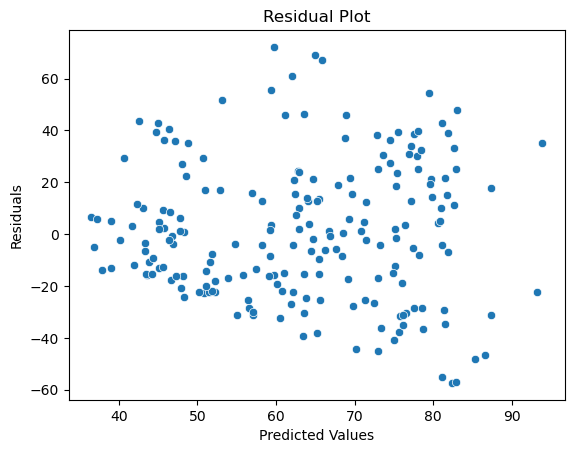

In [39]:
residuals = y_test - y_pred
sns.scatterplot(x=y_pred, y=residuals)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

In [40]:
import statsmodels.api as sm

X_train_with_const = sm.add_constant(X_train)
model_1 = sm.OLS(y_train, X_train_with_const).fit()

print(model_1.summary())

                               OLS Regression Results                              
Dep. Variable:     Average_Watch_Time_mins   R-squared:                       0.269
Model:                                 OLS   Adj. R-squared:                  0.205
Method:                      Least Squares   F-statistic:                     4.221
Date:                     Sun, 27 Apr 2025   Prob (F-statistic):           4.38e-22
Time:                             17:49:36   Log-Likelihood:                -3699.2
No. Observations:                      800   AIC:                             7528.
Df Residuals:                          735   BIC:                             7833.
Df Model:                               64                                         
Covariance Type:                 nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------


### Checking the Linear Regression Assumptions

### 1.Checking and treating for Multicolinearity

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series([variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])], index=X_train.columns)

# Sort the VIF series in ascending order
vif_sorted = vif_series1.sort_values(ascending=False)

# Print the sorted VIF series
print(vif_sorted)

Release_Year                     235.843165
Release_Month                    139.108580
Duration_mins                      8.320757
User_Ratings                       7.261930
Content_Type_Series                7.124306
                                    ...    
Genre_Nature                       1.871992
Peak_Viewership_Day_Tuesday        1.579010
Peak_Viewership_Day_Wednesday      1.093779
Peak_Viewership_Day_Thursday       1.087014
Peak_Viewership_Day_Monday         1.081566
Length: 64, dtype: float64


In [42]:
X_train_2 = X_train.drop(['Release_Year','Release_Month'], axis=1)
X_test_2 = X_test.drop(['Release_Year','Release_Month'], axis=1)
     

In [43]:
model2 = LinearRegression()
model2.fit(X_train_2, y_train)
y_pred_2 = model2.predict(X_test_2)
     

In [44]:
mse_2 = mean_squared_error(y_test, y_pred_2)
r2_2 = r2_score(y_test, y_pred_2)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 700.0060805819608
R-squared: 0.20347588658612337


In [45]:
X_train_2_with_const = sm.add_constant(X_train_2)
model_2 = sm.OLS(y_train, X_train_2_with_const).fit()

print(model_2.summary())

                               OLS Regression Results                              
Dep. Variable:     Average_Watch_Time_mins   R-squared:                       0.263
Model:                                 OLS   Adj. R-squared:                  0.201
Method:                      Least Squares   F-statistic:                     4.240
Date:                     Sun, 27 Apr 2025   Prob (F-statistic):           9.81e-22
Time:                             17:49:36   Log-Likelihood:                -3702.4
No. Observations:                      800   AIC:                             7531.
Df Residuals:                          737   BIC:                             7826.
Df Model:                               62                                         
Covariance Type:                 nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

In [46]:
vif_series2 = pd.Series([variance_inflation_factor(X_train_2.values, i) for i in range(X_train_2.shape[1])], index=X_train_2.columns)
# Sort the VIF series in ascending order
vif_sorted = vif_series2.sort_values(ascending=False)

pd.set_option('display.max_rows', None)
# Now print the VIF series again
print(vif_sorted)

Duration_mins                            8.262281
Content_Type_Series                      7.106813
User_Ratings                             6.716836
Viewership                               4.473743
Content_ID                               4.141226
Subscription_Data                        4.135642
Comments                                 4.048425
Likes                                    4.022937
Shares                                   3.951460
Release_Day                              3.905272
Time_of_Day_Hour                         3.811539
Peak_Viewership_Hour                     3.614155
Release_Weekday                          3.491572
Peak_Viewership_Day_Saturday             2.429252
Content_Type_Movie                       2.319779
Promotion_Data_Email Campaign            2.272451
Seasonality_Spring                       2.237364
Genre_Thriller                           2.177186
Day_of_the_Week_Sunday                   2.170303
Promotion_Data_Print Media               2.165934


In [47]:
X_train_2[['Duration_mins', 'Content_Type_Series', 'User_Ratings']].corr()

,Duration_mins,Content_Type_Series,User_Ratings
Duration_mins,1.000000,0.856709,-0.020771
Content_Type_Series,0.856709,1.000000,-0.043691
User_Ratings,-0.020771,-0.043691,1.000000


In [48]:
# Drop 'Content_Type_Series'
X_train_2 = X_train_2.drop(columns=['Duration_mins', 'Content_Type_Series', 'User_Ratings'])

# Recalculate VIF after dropping
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_series_updated = pd.Series([variance_inflation_factor(X_train_2.values, i) for i in range(X_train_2.shape[1])], index=X_train_2.columns)

# Sort and display
vif_sorted_updated = vif_series_updated.sort_values(ascending=False)
print(vif_sorted_updated)


Viewership                               4.469776
Subscription_Data                        4.121785
Content_ID                               4.085468
Comments                                 4.038306
Likes                                    3.980521
Shares                                   3.927309
Release_Day                              3.864563
Time_of_Day_Hour                         3.801858
Peak_Viewership_Hour                     3.609308
Release_Weekday                          3.469758
Peak_Viewership_Day_Saturday             2.412704
Seasonality_Spring                       2.219236
Promotion_Data_Email Campaign            2.212555
Genre_Thriller                           2.168258
Day_of_the_Week_Wednesday                2.159705
Promotion_Data_Print Media               2.151933
Content_Popularity_Medium                2.149833
Day_of_the_Week_Sunday                   2.143592
Competitor_Content_Similar Series B      2.117805
Viewer_Age_45-54                         2.117555


In [49]:
X_train_2.columns

Index(['Content_ID', 'Viewership', 'Likes', 'Shares', 'Comments',
       'Subscription_Data', 'Release_Day', 'Release_Weekday',
       'Peak_Viewership_Hour', 'Time_of_Day_Hour', 'Content_Type_Movie',
       'Genre_Comedy', 'Genre_Drama', 'Genre_Fantasy', 'Genre_History',
       'Genre_Nature', 'Genre_Romance', 'Genre_Sci-Fi', 'Genre_Thriller',
       'Day_of_the_Week_Monday', 'Day_of_the_Week_Saturday',
       'Day_of_the_Week_Sunday', 'Day_of_the_Week_Thursday',
       'Day_of_the_Week_Tuesday', 'Day_of_the_Week_Wednesday',
       'Peak_Viewership_Day_Monday', 'Peak_Viewership_Day_Saturday',
       'Peak_Viewership_Day_Sunday', 'Peak_Viewership_Day_Thursday',
       'Peak_Viewership_Day_Tuesday', 'Peak_Viewership_Day_Wednesday',
       'Viewer_Age_25-34', 'Viewer_Age_35-44', 'Viewer_Age_45-54',
       'Viewer_Gender_Male', 'Viewer_Location_Canada',
       'Viewer_Location_France', 'Viewer_Location_Germany',
       'Viewer_Location_India', 'Viewer_Location_Italy', 'Viewer_Location_UK'

In [52]:
# Ensure that X_test_2 has the same columns as X_train_2
X_test_2 = X_test_2[X_train_2.columns]

In [53]:
# Now assign the cleaned training and test data
X_train_3 = X_train_2
X_test_3 = X_test_2

# Train the model
model3 = LinearRegression()
model3.fit(X_train_3, y_train)

# Make predictions on the test set
y_pred_3 = model3.predict(X_test_3)

In [54]:
mse_3 = mean_squared_error(y_test, y_pred_3)
r2_3 = r2_score(y_test, y_pred_3)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 700.0060805819608
R-squared: 0.20347588658612337


In [57]:
X_train_3_with_const = sm.add_constant(X_train_3)
model3 = sm.OLS(y_train, X_train_3_with_const).fit()

print(model3.summary())

                               OLS Regression Results                              
Dep. Variable:     Average_Watch_Time_mins   R-squared:                       0.062
Model:                                 OLS   Adj. R-squared:                 -0.013
Method:                      Least Squares   F-statistic:                    0.8316
Date:                     Sun, 27 Apr 2025   Prob (F-statistic):              0.811
Time:                             17:53:23   Log-Likelihood:                -3798.7
No. Observations:                      800   AIC:                             7717.
Df Residuals:                          740   BIC:                             7999.
Df Model:                               59                                         
Covariance Type:                 nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

### MOdel2: Random Forest

In [61]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model performance
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Mean Squared Error:", mse_rf)
print("Random Forest R-squared:", r2_rf)

Random Forest Mean Squared Error: 572.4690935
Random Forest R-squared: 0.3485978910671137


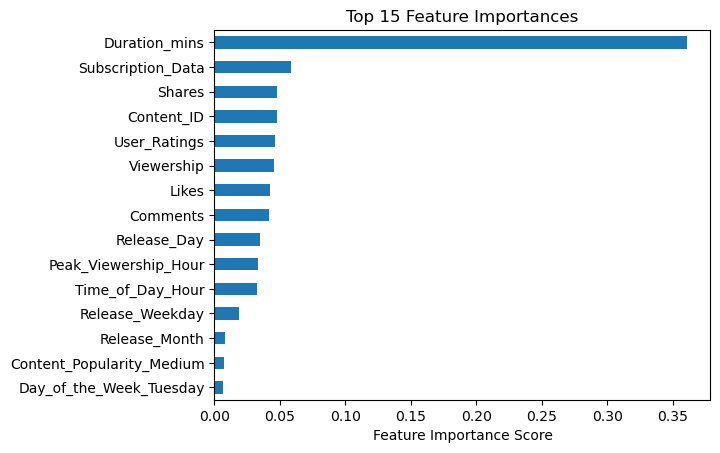

In [62]:
import matplotlib.pyplot as plt
import pandas as pd

feat_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.title("Top 15 Feature Importances")
plt.xlabel("Feature Importance Score")
plt.gca().invert_yaxis()
plt.show()



In [63]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), params, cv=3, scoring='r2')
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)

Best parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}


In [64]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Instantiate model with best parameters
best_rf = RandomForestRegressor(
    max_depth=10,
    min_samples_split=5,
    n_estimators=200,
    random_state=42
)

# Fit on training data
best_rf.fit(X_train, y_train)

# Predict on test data
y_pred = best_rf.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 580.054929443986
R-squared: 0.3399661071192326


In [70]:

# After training your Random Forest model
feat_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)

# Select the top 10 most important features
important_features = feat_importances.nlargest(10).index

# Filter out only the most important features
X_train_selected = X_train[important_features]
X_test_selected = X_test[important_features]

important_features

Index(['Duration_mins', 'Subscription_Data', 'Shares', 'Content_ID',
       'User_Ratings', 'Viewership', 'Likes', 'Comments', 'Release_Day',
       'Peak_Viewership_Hour'],
      dtype='object')

In [71]:
from sklearn.preprocessing import StandardScaler

# Example: Standard scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### Train the Random Forest Model with Scaled Features:

In [72]:
# Instantiate Random Forest with previously tuned hyperparameters
rf_model_scaled = RandomForestRegressor(
    max_depth=10,
    min_samples_split=5,
    n_estimators=200,
    random_state=42
)

# Fit the model with scaled data
rf_model_scaled.fit(X_train_scaled, y_train)

# Predict on scaled test data
y_pred_scaled = rf_model_scaled.predict(X_test_scaled)

# Evaluate the model performance
mse_scaled = mean_squared_error(y_test, y_pred_scaled)
r2_scaled = r2_score(y_test, y_pred_scaled)

print(f"Random Forest with Scaled Data - Mean Squared Error: {mse_scaled}")
print(f"Random Forest with Scaled Data - R-squared: {r2_scaled}")


Random Forest with Scaled Data - Mean Squared Error: 580.2942730163237
Random Forest with Scaled Data - R-squared: 0.3396937624467419


In [73]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Define model
rf_model = RandomForestRegressor(
    max_depth=10,
    min_samples_split=5,
    n_estimators=200,
    random_state=42
)

# Perform cross-validation
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Convert negative MSE to positive and calculate mean and standard deviation
cv_scores = -cv_scores  # Negate scores to get positive MSE
mean_mse = np.mean(cv_scores)
std_mse = np.std(cv_scores)

print(f"Cross-Validation Mean MSE: {mean_mse}")
print(f"Cross-Validation Standard Deviation of MSE: {std_mse}")


Cross-Validation Mean MSE: 609.2325241110427
Cross-Validation Standard Deviation of MSE: 60.26110785033777


In [74]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define model
rf_model = RandomForestRegressor(random_state=42)

# Define hyperparameters grid
param_grid = {
    'n_estimators': [50, 100, 200],        # Number of trees
    'max_depth': [5, 10, 15],              # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],       # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 5],         # Minimum samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'] # Number of features to consider when looking for the best split
}

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Print best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Mean MSE:", -grid_search.best_score_)

# Use the best model found from GridSearchCV
best_rf_model = grid_search.best_estimator_

# Evaluate on test set
y_pred_best_rf = best_rf_model.predict(X_test)
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)

print(f"Best Random Forest Mean Squared Error: {mse_best_rf}")
print(f"Best Random Forest R-squared: {r2_best_rf}")


Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}
Best Cross-Validation Mean MSE: 620.1819784216002
Best Random Forest Mean Squared Error: 655.8574520960638
Best Random Forest R-squared: 0.2537118032997787


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
405 fits failed out of a total of 1215.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
202 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\DELL\anaconda3\Lib\site-packages\s

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Train-test split (if not done previously)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the XGBoost Regressor
xg_reg = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)

# Fit the model to the training data
xg_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xg = xg_reg.predict(X_test)

# Evaluate the model performance
mse_xg = mean_squared_error(y_test, y_pred_xg)
r2_xg = r2_score(y_test, y_pred_xg)

print(f"XGBoost Mean Squared Error: {mse_xg}")
print(f"XGBoost R-squared: {r2_xg}")



### Model3: XGBOOST

In [75]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize XGBoost model
xgb_model = XGBRegressor(random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost Model MSE: {mse_xgb}, R²: {r2_xgb}")


XGBoost Model MSE: 600.009161928054, R²: 0.3172605633735657


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define a narrower grid around the best parameters
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [8, 10, 12],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(XGBRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get best parameters and model
print(f"Best Parameters from GridSearchCV: {grid_search.best_params_}")

# Re-train with best parameters
best_xgb_model_grid = grid_search.best_estimator_
y_pred_best_xgb_grid = best_xgb_model_grid.predict(X_test)

# Evaluate the model
mse_best_xgb_grid = mean_squared_error(y_test, y_pred_best_xgb_grid)
r2_best_xgb_grid = r2_score(y_test, y_pred_best_xgb_grid)

print(f"XGBoost GridSearchCV Model - MSE: {mse_best_xgb_grid}, R²: {r2_best_xgb_grid}")
